<img src="boggle.png" width="100">

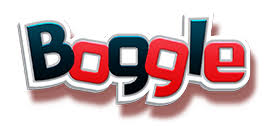

I love you so much babie


In [ ]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from IPython.display import HTML

i = Image(filename='boggle.png')
display(i)
print('I love you so much babie')
display(YouTubeVideo('iV2ViNJFZC8'))
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/S_f2qV2_U00?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


import copy
class Graph(object):
    def __init__(self, board):
        self.board = board
        self.letters = {}
        self.adj_list = {}
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        for i in range(5):
            for j in range(5):
                if board[i][j] not in self.letters:
                    self.letters[board[i][j]] = []
                self.letters[board[i][j]].append((i, j))
                self.adj_list[(board[i][j], i, j)] = []
                for d1, d2 in directions:
                    k = i + d1
                    l = j + d2
                    if k >= 0 and k < 5 and l >= 0 and l < 5:
                        self.adj_list[(board[i][j], i, j)].append((board[k][l], k, l))

    def dfs(self, word):
        if len(word) < 4:
            return False
        stack = []
        if word[0] not in self.letters:
            return False
        for i, j in self.letters[word[0]]:
            stack.append((word[0], word, (word[0], i, j), set([(i, j)])))
        while len(stack) > 0:
            sub, word, let, positions = stack.pop()
            if sub == word:
                return True
            next_letter = word[len(sub)]
            for l, i, j in self.adj_list[let]:
                if l == next_letter and (i, j) not in positions:
                    p2 = copy.deepcopy(positions)
                    p2.add((i, j))
                    stack.append((sub + next_letter, word, (l, i, j), p2))
        return False


d = []


def load_dictionary():
    with open('dictionary.txt') as f:
        for line in f:
            if len(line) >= 4 and not line[0].isupper():
                d.append(line.upper()[:-1])


def points(word):
    if len(word) == 4:
        return 1
    if len(word) == 5:
        return 2
    if len(word) == 6:
        return 3
    if len(word) == 7:
        return 5
    if len(word) >= 8:
        return 11
    return 0


def find_words(board):
    g = Graph(board)
    words = []
    for word in d:
        if g.dfs(word):
            words.append((word, points(word)))
    return words


def boggle_input():
    board = []
    for i in range(5):
        board.append(input().split())
    words = find_words(board)
    total_points = 0
    for word, points in words:
        total_points += points
        print(word + " " + str(points))
    print(total_points)


if __name__ == '__main__':
    load_dictionary()
    boggle_input()